## 載入內建的MNIST dataset



In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


## RGB圖片格式為width, height, channels，加上ID數維度為。(ID, width, height, channel)

In [4]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)


11493376/11490434 [==============================] - 1s 0us/step


# CNN模型的建立


## 匯入必要的模組(可自行添加需要的模組)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


## 建立模型(在下方建立自己的模型)
## 使用model.add()

In [0]:
model = Sequential()
model.add(Conv2D(filters=20,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=40,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



 

## review整個model

In [7]:
model.summary()       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 40)        20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               251008    
__________

## 訓練模型
## 評估訓練結果

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 106s - loss: 0.4439 - acc: 0.8599 - val_loss: 0.0778 - val_acc: 0.9748
Epoch 2/10
 - 107s - loss: 0.1294 - acc: 0.9608 - val_loss: 0.0487 - val_acc: 0.9841
Epoch 3/10
 - 107s - loss: 0.0999 - acc: 0.9698 - val_loss: 0.0382 - val_acc: 0.9879
Epoch 4/10
 - 107s - loss: 0.0825 - acc: 0.9754 - val_loss: 0.0318 - val_acc: 0.9886
Epoch 5/10
 - 108s - loss: 0.0716 - acc: 0.9787 - val_loss: 0.0306 - val_acc: 0.9899
Epoch 6/10
 - 107s - loss: 0.0651 - acc: 0.9806 - val_loss: 0.0351 - val_acc: 0.9892
Epoch 7/10
 - 107s - loss: 0.0574 - acc: 0.9824 - val_loss: 0.0249 - val_acc: 0.9921
Epoch 8/10
 - 107s - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0225 - val_acc: 0.9918
Epoch 9/10
 - 107s - loss: 0.0509 - acc: 0.9849 - val_loss: 0.0244 - val_acc: 0.9922
Epoch 10/10
 - 107s - loss: 0.0483 - acc: 0.9850 - val_loss: 0.0225 - val_acc: 0.9926


## 顯示準確率


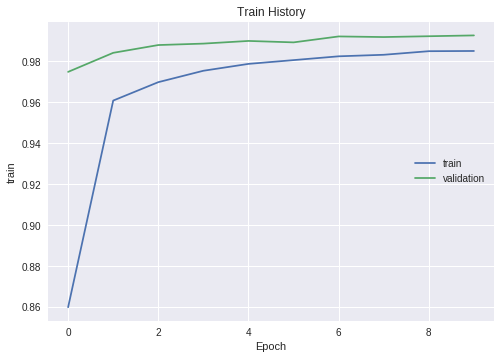

In [9]:
show_train_history(train_history, 'acc','val_acc')


## 顯示誤差率

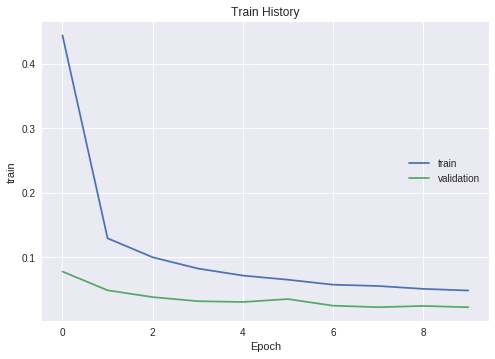

In [10]:
show_train_history(train_history, 'loss','val_loss')

## 使用test dataset來評估模型的準確率

In [11]:
scores = model.evaluate(X_test, y_test)
scores[1]

10000/10000 [==============================] - 8s 823us/step


0.9926

## 混淆矩陣

In [12]:
import pandas as pd
prediction = model.predict_classes(X_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1130,1,1,0,0,1,2,0,0
2,1,0,1027,0,0,0,0,3,1,0
3,0,0,0,1006,0,1,0,2,1,0
4,0,0,0,0,981,0,0,0,0,1
5,2,0,0,5,0,880,2,0,1,2
6,1,2,0,0,1,1,953,0,0,0
7,0,1,3,2,0,0,0,1021,1,0
8,1,0,1,1,1,1,0,3,965,1
